# Econ 220 Final Project
## Introduction
### Motivation
### Importance

## Literature Review

## Data

## Group Members
- Jason
- Briana Yang
- Franklin Zhang
- Alexander Liu

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
data_path = "Data"

df = pd.read_csv(os.path.join(data_path,"usa_00002.csv.gz"))

In [3]:
df.columns

Index(['YEAR', 'SAMPLE', 'SERIAL', 'CBSERIAL', 'HHWT', 'CLUSTER', 'STRATA',
       'GQ', 'PERNUM', 'PERWT', 'SEX', 'AGE', 'RACE', 'RACED', 'EDUC', 'EDUCD',
       'VETSTAT', 'VETSTATD'],
      dtype='object')

In [18]:
df.index


RangeIndex(start=0, stop=3239553, step=1)

In [4]:
data = df[['AGE','EDUC','VETSTAT','VETSTATD','RACE','SEX']]

In [5]:
data

,AGE,EDUC,VETSTAT,VETSTATD,RACE,SEX
0,39,4,1,11,2,1
1,21,4,1,11,1,2
2,19,7,1,11,2,1
3,77,3,1,11,1,1
4,41,3,1,11,2,1
...,...,...,...,...,...,...
3239548,63,6,1,11,1,2
3239549,45,5,1,11,1,1
3239550,85,6,1,11,1,2
3239551,67,11,1,11,1,2


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239553 entries, 0 to 3239552
Data columns (total 6 columns):
 #   Column    Dtype
---  ------    -----
 0   AGE       int64
 1   EDUC      int64
 2   VETSTAT   int64
 3   VETSTATD  int64
 4   RACE      int64
 5   SEX       int64
dtypes: int64(6)
memory usage: 148.3 MB


## Data Cleaning and Preprocessing

In [12]:
data['EDUC'].value_counts()

EDUC
6     957679
10    507242
7     378171
11    320738
1     235229
8     217713
2     208489
0     189602
5      82793
4      74787
3      67110
Name: count, dtype: int64

In [8]:
data['VETSTAT'].value_counts()

VETSTAT
1    2433934
0     601405
2     204214
Name: count, dtype: int64

In [13]:
data['SEX'].value_counts()

SEX
2    1651221
1    1588332
Name: count, dtype: int64

In [14]:
data['RACE'].value_counts()

RACE
1    2501187
2     303874
6     129502
7     115099
8      90322
4      46070
3      33216
9      12193
5       8090
Name: count, dtype: int64

c:\Users\Alexa\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='AGE', ylabel='Count'>

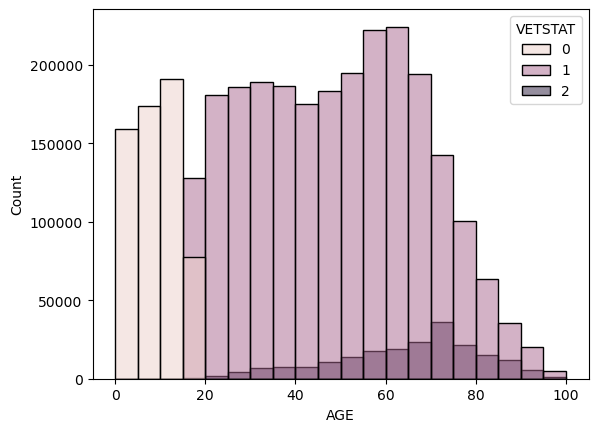

In [9]:
sns.histplot(data=data, x='AGE',hue='VETSTAT',binwidth=5)

### Vetstat codes
- 0: N/A
- 1: Not a veteran
- 2: Is a veteran
- 9: Unknown

In [29]:
# Remove VETSTAT codes 0 (N/A) and 9 (unknown)
data = data[~data['VETSTAT'].isin(set([0,9]))] # Remove people not qualified to serve as a veteran by AGE or other reasons

### Update VETSTAT codes
- 0: Not a veteran
- 1: Is a veteran

In [38]:
vetstat_conversion = {1:0, 2:1}
data['VETSTAT'] = data['VETSTAT'].apply(lambda x: vetstat_conversion[x])
data['VETSTAT'].value_counts()

VETSTAT
0    2433934
1     204214
Name: count, dtype: int64

### EDUC codes
- 00: N/A or no schooling
- 01: Nursery school to grade 4
- 02: Grade 5, 6, 7, or 8
- 03: Grade 9
- 04: Grade 10
- 05: Grade 11
- 06: Grade 12
- 07: 1 year of college
- 08: 2 years of college
- 09: 3 years of college
- 10: 4 years of college
- 11: 5+ years of college
- 99: Missing

In [35]:
data = data[data['EDUC'] != 99]

c:\Users\Alexa\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Non-Veteran vs Veteran Status by Age')

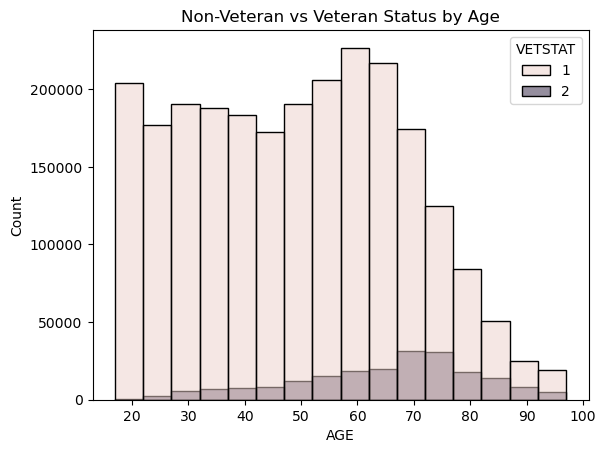

In [30]:
sns.histplot(data=data, x='AGE',hue='VETSTAT',binwidth=5).set_title('Non-Veteran vs Veteran Status by Age')

Text(0.5, 1.0, 'Veteran Status By Education Level Code')

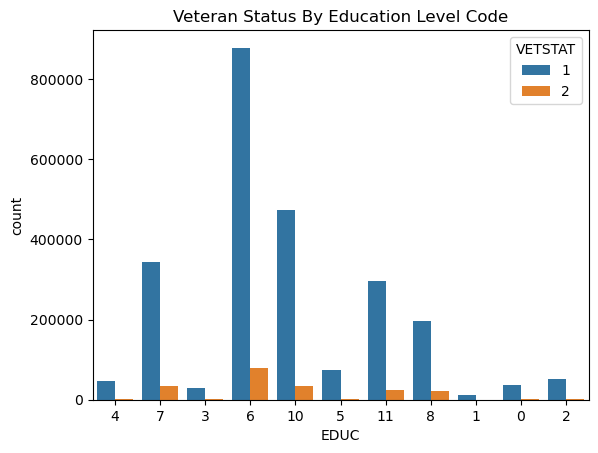

In [33]:
sns.countplot(data=data.astype(str), x='EDUC',hue="VETSTAT").set_title('Veteran Status By Education Level Code')

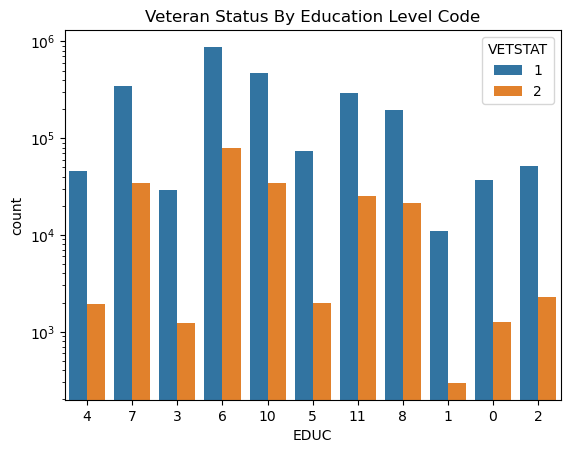

In [32]:
sns.countplot(data=data.astype(str), x='EDUC',hue="VETSTAT").set_title('Veteran Status By Education Level Code')
# Since veterans are a clear minority, we add a log scale to create more clarity
plt.yscale('log')

<Axes: xlabel='VETSTAT', ylabel='count'>

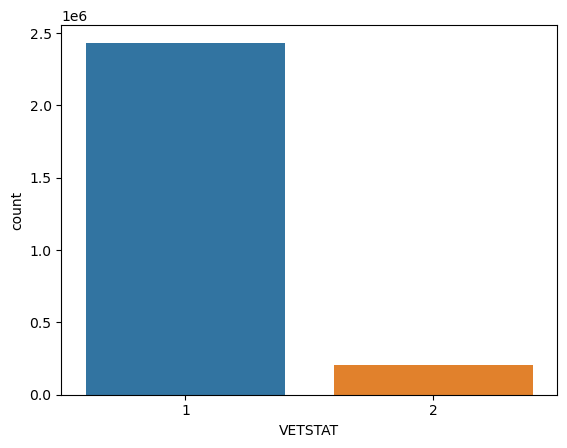

In [61]:
sns.countplot(data=data, x='VETSTAT')

In [19]:
# Display descriptive statistics for AGE
data['AGE'].agg(['mean','std','min','max','count'])

<class 'pandas.core.series.Series'>


In [ ]:
data['VE'].agg(['mean','std','min','max','count'])